# Xibc analysis
This notebook presents all study on Xibc decay to JpisLc. 

We will se what xgboost can do.  
Study roadmap
------

1. Grab MC sugnal and background from NTuple.
2. Use the same set of feature. 
3. Play with model's hyperparameters 
4. Perform additional feature engeenering

After all of this steps I will try to use Deep Neural Network. 

<font color="red">TMVA baseline to beat is more than 0.977% (roc_auc). </font>  
--------

In [1]:
print("Kernel is alive!")

Kernel is alive!


In [84]:
import root_numpy
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import ROOT
%matplotlib inline

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

#sklearn imports 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import KFold
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.externals import joblib

## The very first step is to grab data from NTuple. 

I take as a signal MC data and as a background wrong sign data.  
For a very first try I use only one background file. 

In [6]:
branches = ["Xb_LOKI_DTF_CHI2NDOF_massConstr", 
            "Xb_DIRA_OWNPV", 
           "Xb_ENDVERTEX_X",
            "Xb_OWNPV_X",
            "Xb_ENDVERTEX_Y",
            "Xb_OWNPV_Y",
            "Xb_PT",
            "Jpsi_IPCHI2_OWNPV",
            "Xc_PT",
            "Xc_IPCHI2_OWNPV",
            "Xc_TAU",
            "Pr_IPCHI2_OWNPV",
            "K_IPCHI2_OWNPV",
            "Pi_IPCHI2_OWNPV",
            "Pr_V3ProbNNp",
            "K_V3ProbNNk",
            "Pi_V3ProbNNpi",
            "Pr_P",
            "K_P",
            "Pi_P",
            "mup_IPCHI2_OWNPV",
            "mum_IPCHI2_OWNPV"]

In [17]:
root_file_signal = ROOT.TFile("../datasets/eos_data/mc/JpsiLc_mc.tuned.pkpi.root")
tree_signal = root_file_signal.Get("mytree")
data_signal = pd.DataFrame(root_numpy.tree2array(tree_signal, branches=branches))


data_signal["Label"] = True

root_file_background = ROOT.TFile("../datasets/eos_data/data/All_2011_MAGUP.pkpi.ws.root")
tree_background = root_file_background.Get("mytree")
data_background = pd.DataFrame(root_numpy.tree2array(tree_background, branches=branches))

data_background["Label"] = False

#combine background and signal into one dataset
data = pd.concat([data_signal, data_background])
features = data.drop("Label", axis=1).astype(numpy.float64)
target = data.Label

target = data.Label
features = data.drop("Label", axis=1).astype(numpy.float64)
features.head()

,Xb_LOKI_DTF_CHI2NDOF_massConstr,Xb_DIRA_OWNPV,Xb_ENDVERTEX_X,Xb_OWNPV_X,Xb_ENDVERTEX_Y,Xb_OWNPV_Y,Xb_PT,Jpsi_IPCHI2_OWNPV,Xc_PT,Xc_IPCHI2_OWNPV,...,K_IPCHI2_OWNPV,Pi_IPCHI2_OWNPV,Pr_V3ProbNNp,K_V3ProbNNk,Pi_V3ProbNNpi,Pr_P,K_P,Pi_P,mup_IPCHI2_OWNPV,mum_IPCHI2_OWNPV
0,0.761404,1.000000,0.736023,0.631871,-0.056552,0.086903,8852.152589,21.199829,6319.060914,37.879963,...,104.963226,4.937229,0.999830,0.999795,0.999748,71130.96,50244.10,20496.71,0.181286,69.544206
1,4.876074,0.999996,0.476534,0.647600,0.005998,0.058400,3684.572426,150.032721,2813.823263,72.054261,...,30.519059,13.626168,0.824141,0.470274,0.902844,40354.40,14395.50,7730.08,476.588945,229.775196
2,0.898859,0.999992,0.464668,0.647600,-0.012218,0.058400,3891.390541,150.032721,3251.003343,166.477197,...,30.320383,362.377086,0.932525,0.628076,0.950362,40354.40,14395.50,6626.47,476.588945,229.775196
3,2.519304,0.999550,0.643017,0.664180,-0.007558,0.044266,6780.884133,0.010610,3981.272084,43.840607,...,14.135477,25.010039,0.854529,0.998201,0.987817,10129.81,17689.43,2342.34,40.124295,0.916849
4,5.379155,0.999612,0.595503,0.612800,0.185388,0.104600,5506.424691,17.768140,4586.403590,21.039379,...,11.755835,66.071454,0.727954,0.576882,0.963202,35657.23,17116.64,14495.60,27.859781,40.917923


In [ ]:
def basic_transforamtion(data):
    #pseudorapidity and seed_r
    out = data
    out[""]

    return out    

### Print data

At the begining of my study I will focus on presentatio of the data.   
This is very important step. I need to know how data looks, what features can be usefull etc. 

In [20]:
def print_features_histograms(features, target):
    hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
    # create the figure
    fig = plt.figure(figsize=(16,  25))
    for n, feature in enumerate(features):
        # add sub plot on our figure
        ax = fig.add_subplot(features.shape[1] // 5 + 1, 6, n + 1)
        # define range for histograms by cutting 1% of data from both ends
        min_value, max_value = numpy.percentile(features[feature], [1, 99])
        ax.hist(features.ix[target == 0, feature].values, range=(min_value, max_value), 
                 label='signal', **hist_params)
        ax.hist(features.ix[target == 1, feature].values, range=(min_value, max_value), 
                 label='background', **hist_params)
        ax.legend(loc='best')

        ax.set_title(feature)

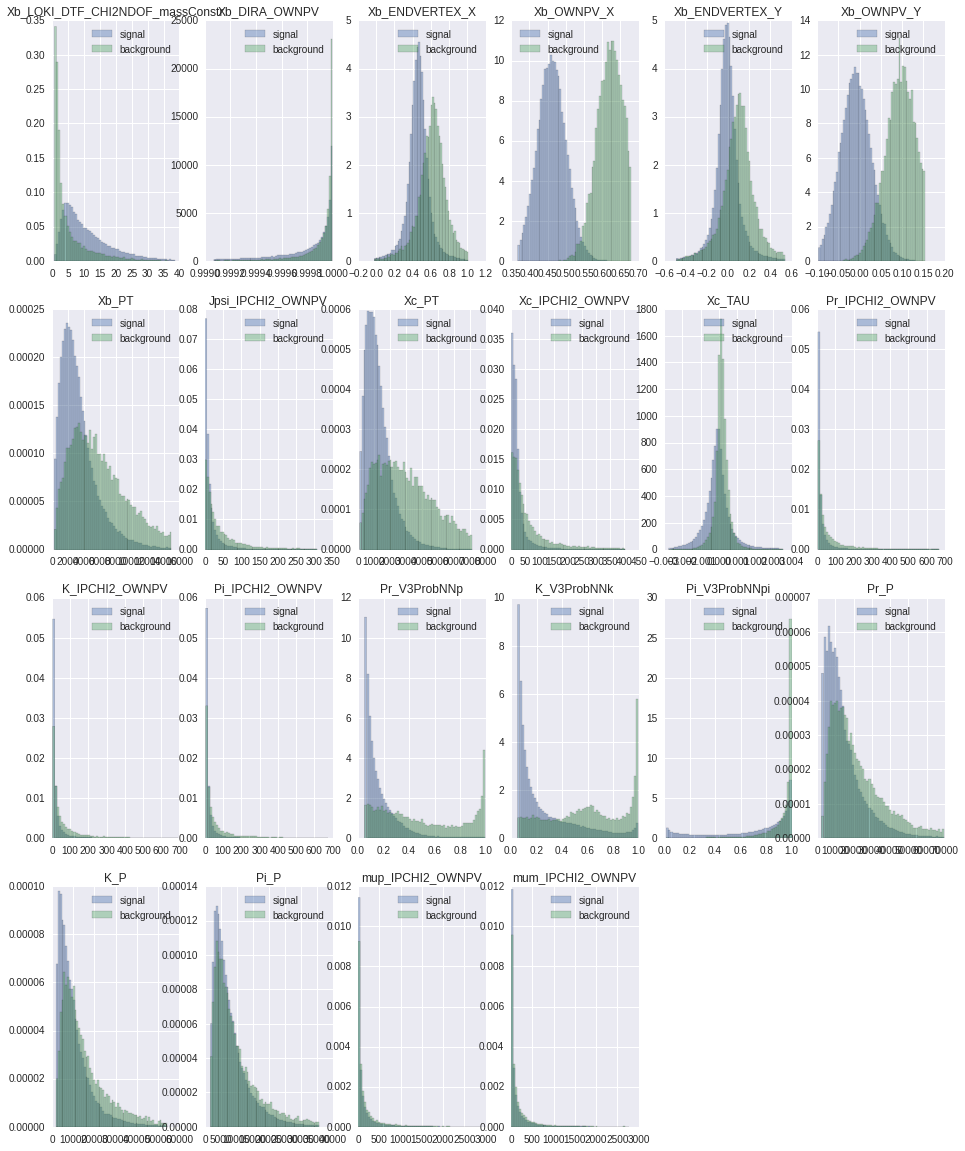

In [21]:
print_features_histograms(features, target)

In [22]:
def feature_boxplot(features):
    for n, feature in enumerate(features):
    # add sub plot on our figure
        ax = fig.add_subplot(features.shape[1] // 5 + 1, 6, n + 1)
        data.boxplot(feature,by='Label', ax=ax, whis='range');
        ax.legend(loc='best')  

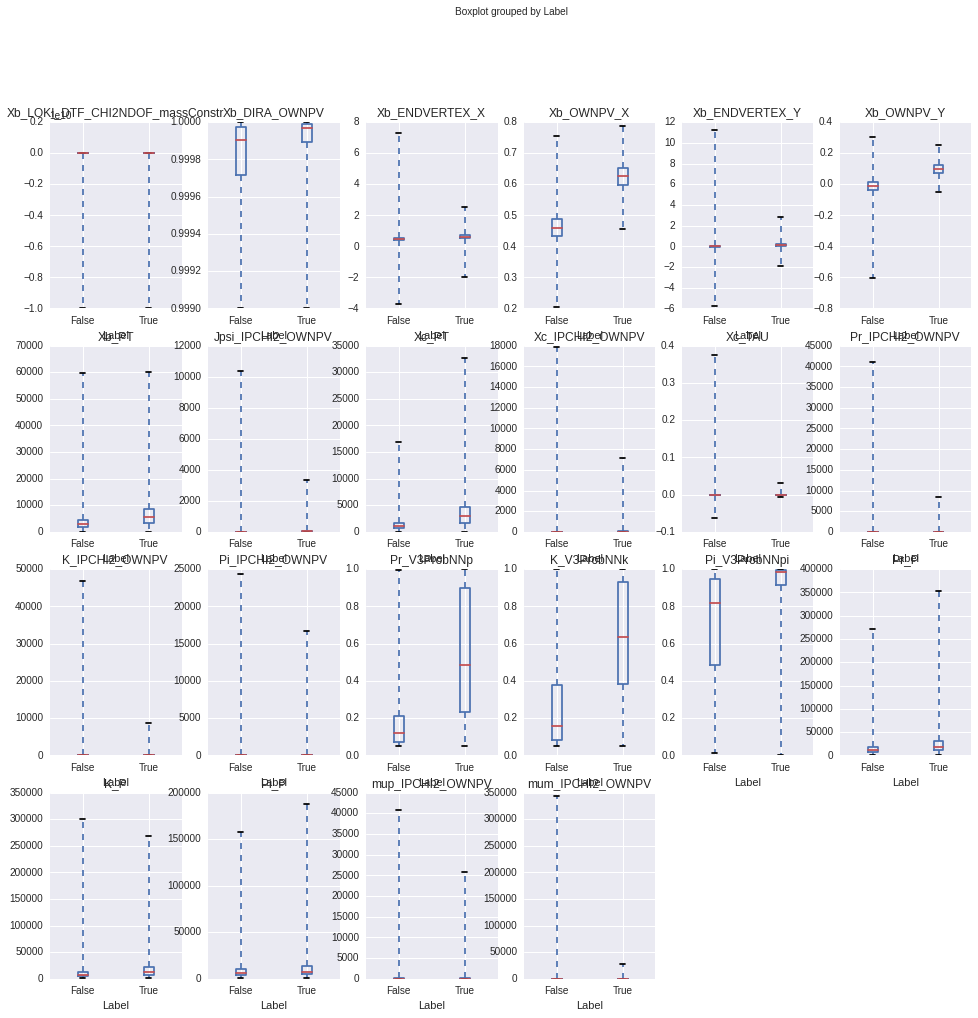

In [23]:
fig = plt.figure(figsize=(16,  20))
feature_boxplot(features)

### Correlation plots
I also need to look at the correlations matrix. 
I will print a few that kind of plots. 

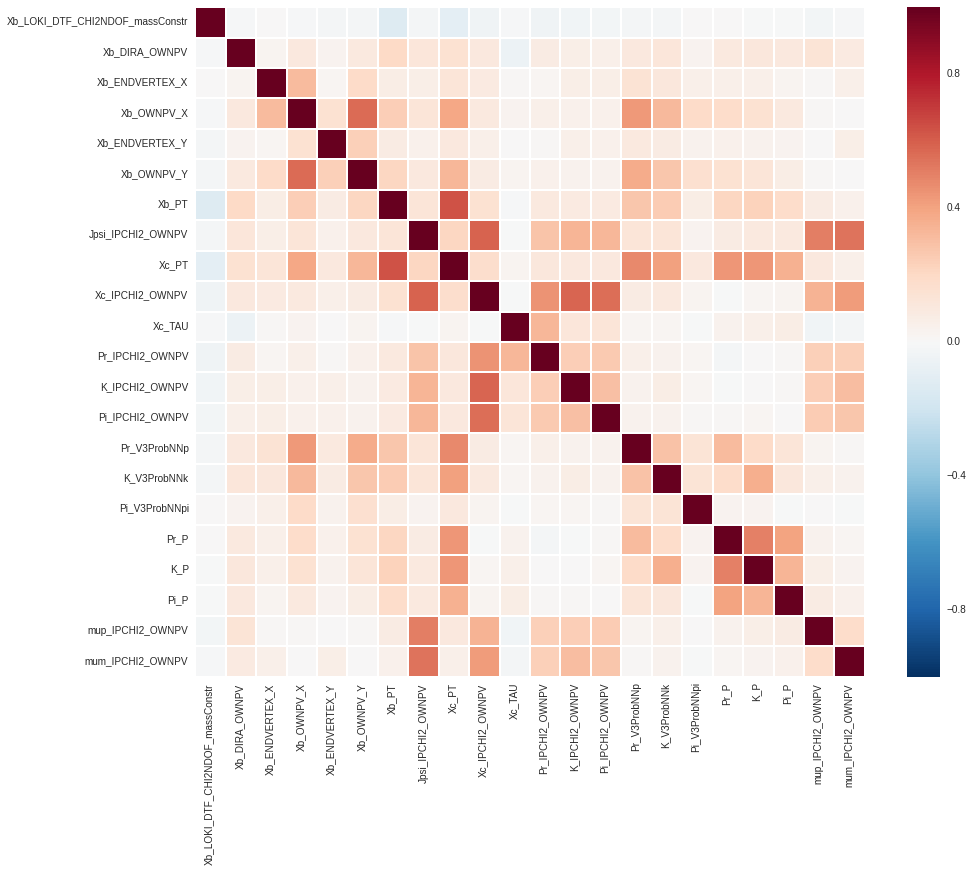

In [25]:
cor_mat = features.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(cor_mat,linewidths=.5, ax=ax);

#### Correlation plot for signal

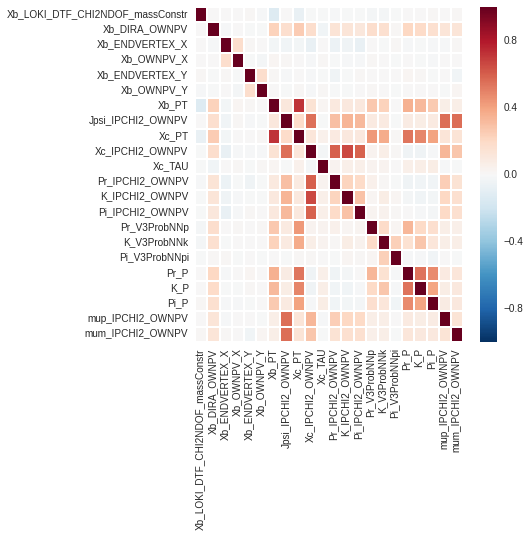

In [31]:
cor_mat_signal = features[target==True].corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cor_mat_signal,linewidths=.5, ax=ax);

#### Correlation plot for background

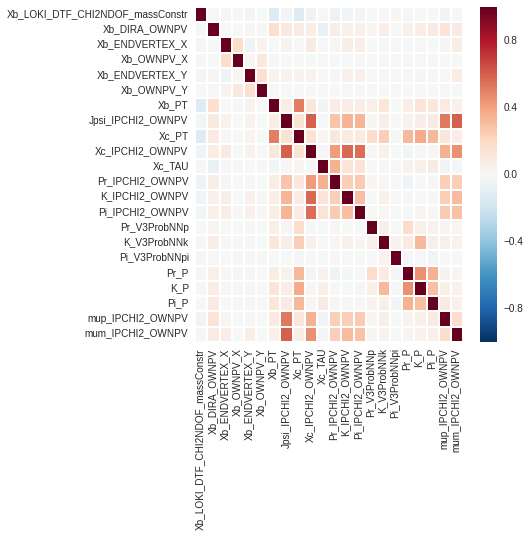

In [30]:
cor_mat_back= features[target==False].corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cor_mat_back,linewidths=.5, ax=ax);

I make nice pair plots.  
I will use this set of variables to visualizate decision bondaries.   
Probably I will add more features to this plots.  

In [60]:
def pairplot(vars):
    sns.pairplot(data, hue="Label", vars=vars, plot_kws={'alpha': 0.5, 'marker': '.'})

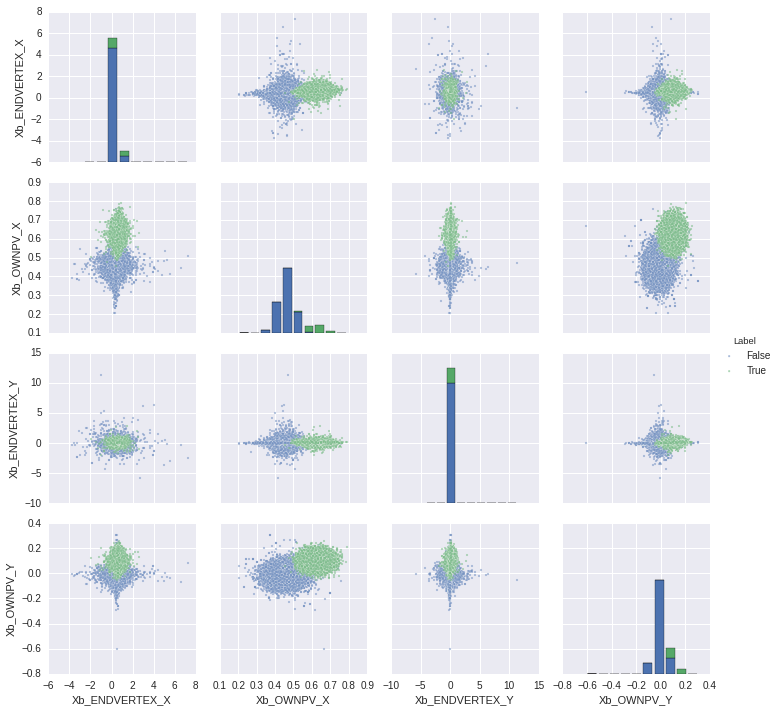

In [61]:
vars = ["Xb_ENDVERTEX_X",
            "Xb_OWNPV_X",
            "Xb_ENDVERTEX_Y",
            "Xb_OWNPV_Y"]
pairplot(vars)

## Train basic BDT classifier. 
I will train the BDT using default hyperparameters values.  
As a model I will use sklearn Gradient Boosted Classifier. 

In [68]:
train_X, test_X, train_Y, test_Y = train_test_split(features, target, random_state=42,train_size=0.5 )

gb = GradientBoostingClassifier( n_estimators=100, learning_rate=0.2, max_depth=6, max_features=8, verbose=3)
gb.fit(train_X, train_Y)
joblib.dump(gb, 'models/BDT_default.pkl') 

      Iter       Train Loss   Remaining Time 
         1           0.3787           55.72s
         2           0.2959           46.53s
         3           0.2345           43.22s
         4           0.1884           41.00s
         5           0.1534           39.83s
         6           0.1259           38.96s
         7           0.1036           38.05s
         8           0.0858           37.20s
         9           0.0718           36.48s
        10           0.0604           36.76s
        11           0.0510           36.04s
        12           0.0431           35.40s
        13           0.0366           34.73s
        14           0.0315           34.29s
        15           0.0273           33.81s
        16           0.0237           33.40s
        17           0.0203           33.07s
        18           0.0175           32.56s
        19           0.0154           32.00s
        20           0.0137           31.51s
        21           0.0122           31.02s
        2

['models/BDT_default.pkl',
 'models/BDT_default.pkl_01.npy',
 'models/BDT_default.pkl_02.npy',
 'models/BDT_default.pkl_03.npy']

In [69]:
print "ROC AUC score"
roc_auc_score(test_Y, gb.predict_proba(test_X)[:, 1])

ROC AUC score


0.99982634933085746

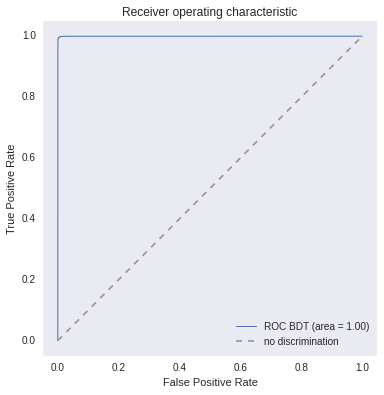

In [70]:
plt.figure(figsize=[6, 6])
fpr, tpr, thresholds = roc_curve(test_Y, gb.predict_proba(test_X)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC BDT (area = %0.2f)'%(roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='no discrimination')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Check overfitting via crossvalidation

In [ ]:
gb_cv = GradientBoostingClassifier( n_estimators=100, learning_rate=0.2, max_depth=6, max_features=8, verbose=3)

scores = cross_validation.cross_val_score(gb_cv,
                                          features, target,
                                          scoring="roc_auc",
                                          n_jobs=6,
                                          cv=6);

In [88]:
"Accuracy: %0.5f (+/- %0.5f)"%(scores.mean(), scores.std())

'Accuracy: 0.99981 (+/- 0.00003)'